1. Import Libraries & Load Dataset

In [ ]:
#  Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup for beautiful plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# View first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.Understand the Dataset (Summary Statistics)

In [6]:
# Check column names, types, and non-null values
print("Dataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Summary statistics like mean, std, min, max
print("Summary Statistics:\n")
df.describe()


Summary Statistics:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check for missing values in each column
print("Missing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


3.Visualize the Data

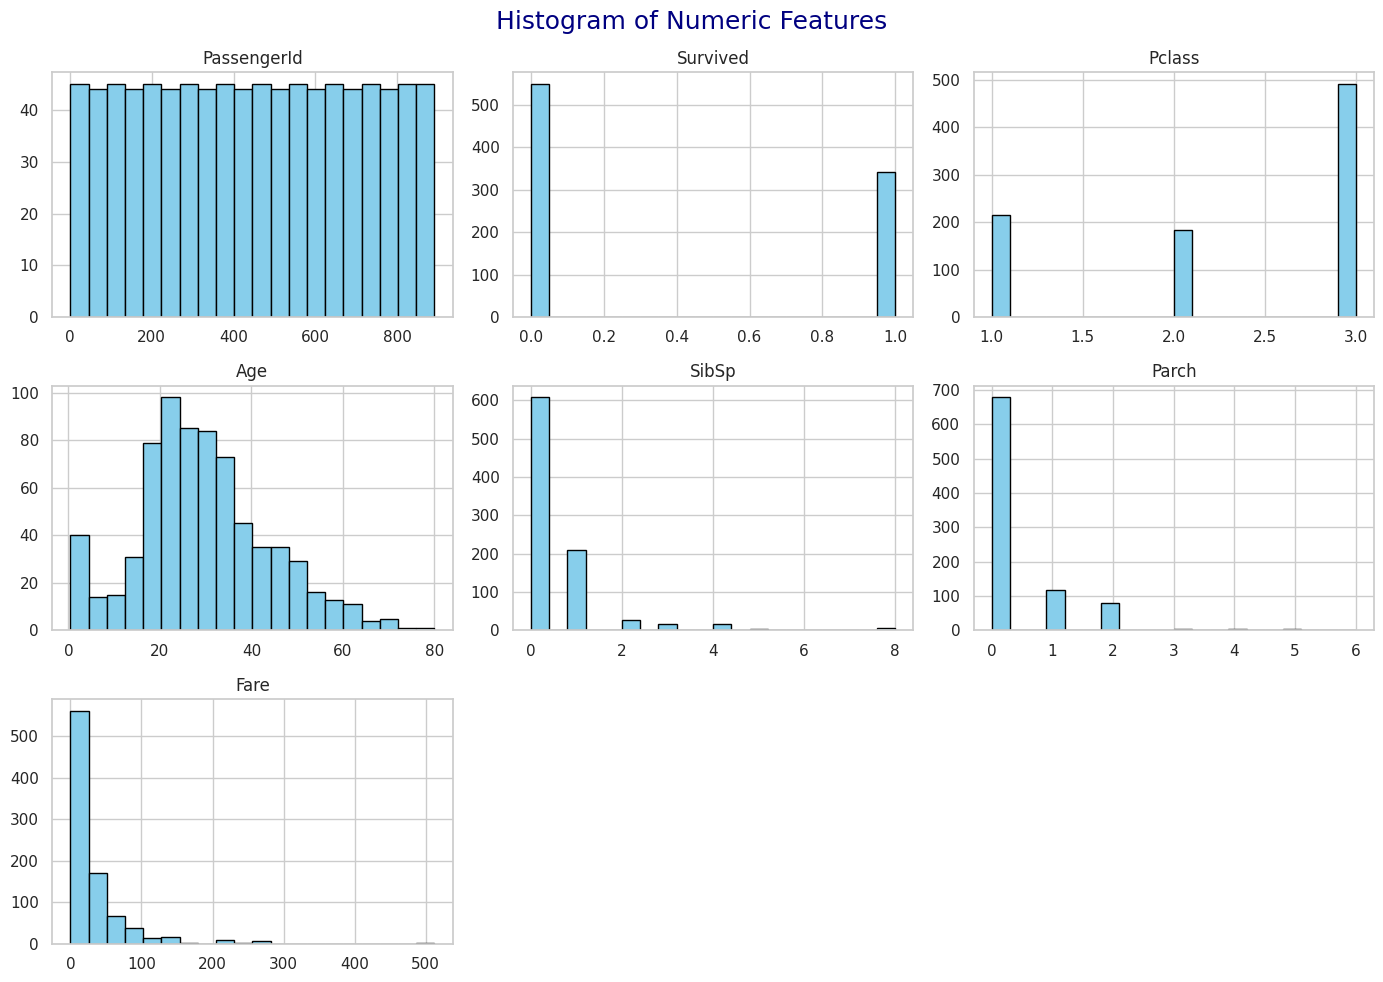

In [10]:
# Plot histograms for all numeric columns
df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numeric Features", fontsize=18, color='navy')
plt.tight_layout()
plt.show()


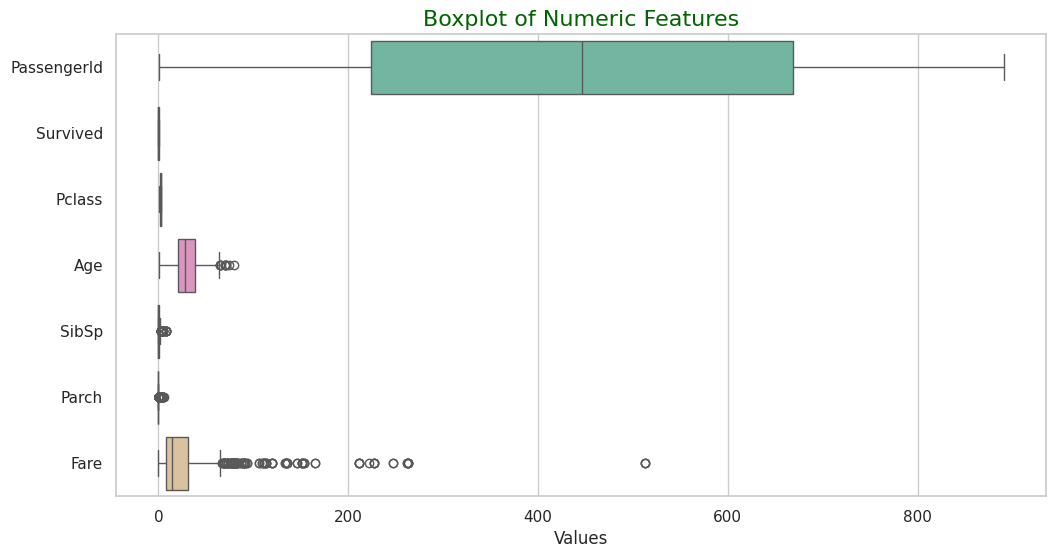

In [13]:
# Boxplots for numeric columns to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h', palette='Set2')
plt.title("Boxplot of Numeric Features", fontsize=16, color='darkgreen')
plt.xlabel("Values")
plt.show()


4. Clean the Data

In [14]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Re-check missing values
df.isnull().sum()


<ipython-input-14-f57df6f3437b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-14-f57df6f3437b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
# Remove Fare outliers beyond 99th percentile
fare_limit = df['Fare'].quantile(0.99)
df = df[df['Fare'] < fare_limit]


5.Feature-Level Analysis (Patterns & Trends)

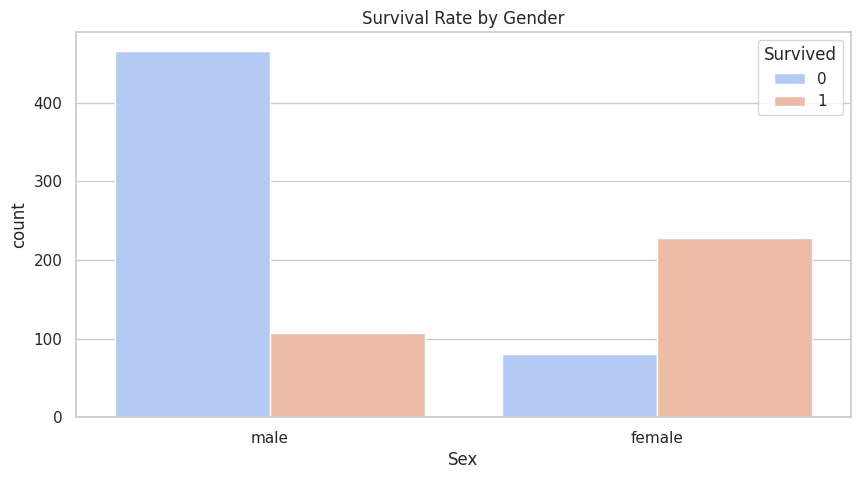

In [16]:
#Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()


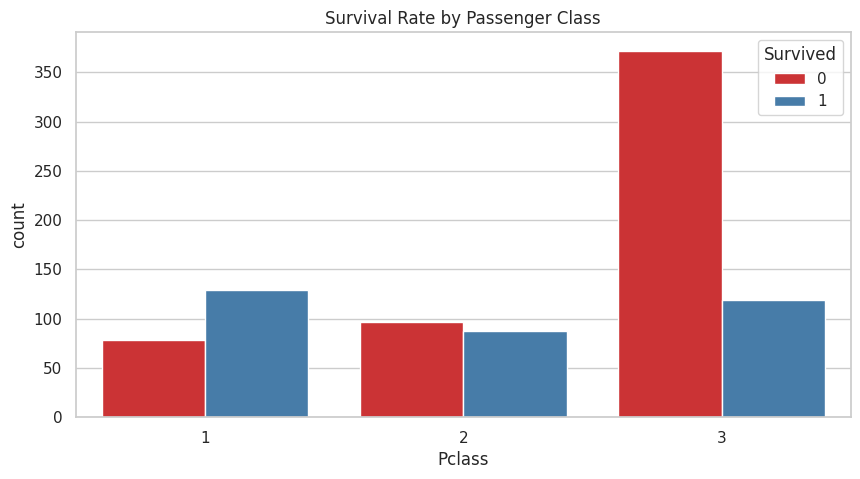

In [17]:
#Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival Rate by Passenger Class")
plt.show()


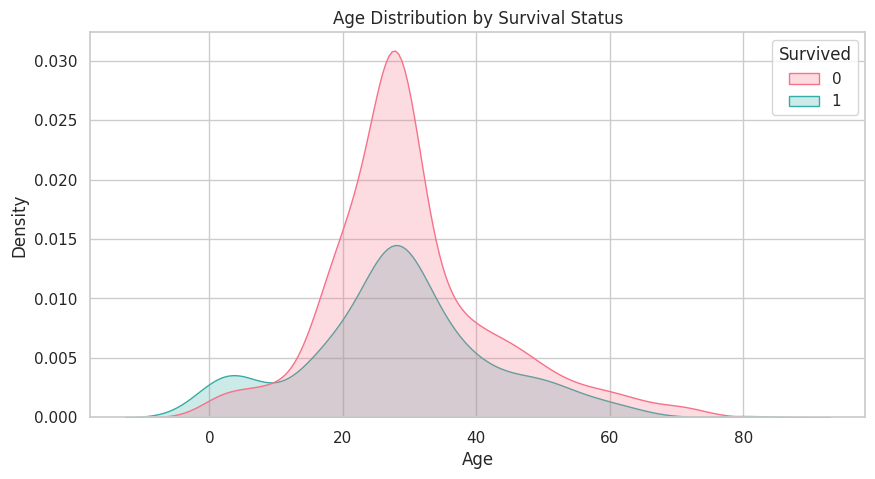

In [18]:
#Age Distribution by Survival
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='husl')
plt.title("Age Distribution by Survival Status")
plt.show()


6. Correlation and Relationships

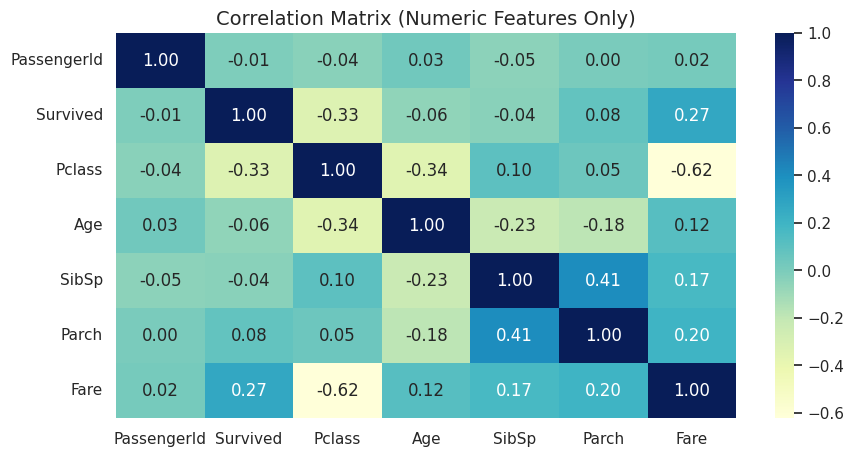

In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)", fontsize=14)
plt.show()


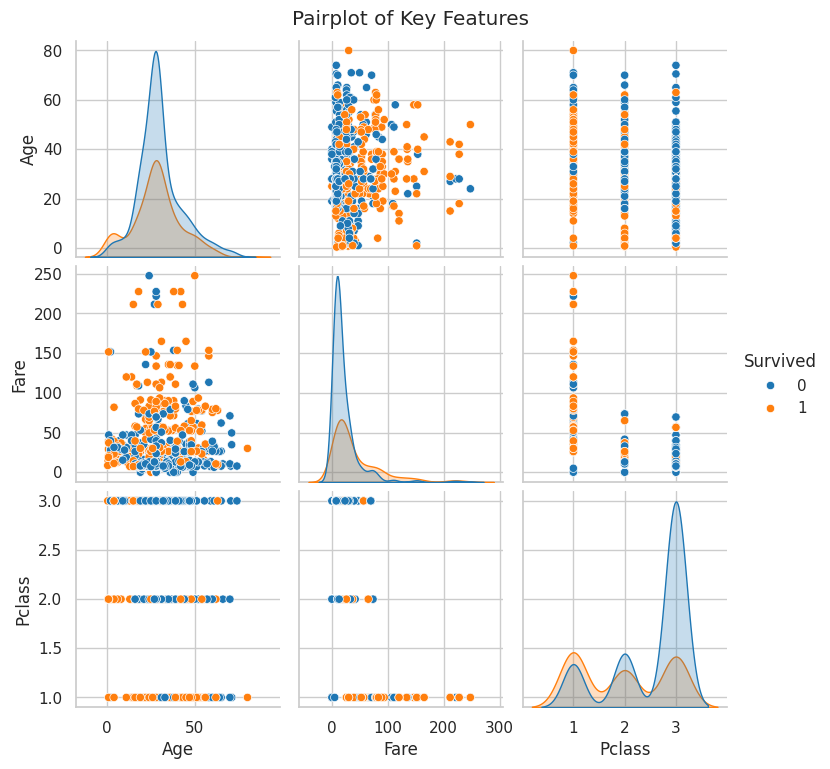

In [25]:
#Pairplot for Relationships
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', palette='tab10')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

7.Interactive Plotly Visualization

In [26]:
# Interactive plot of Fare vs Age, color-coded by survival
fig = px.scatter(df, x="Age", y="Fare", color="Survived",
                 title="Interactive Survival Plot: Fare vs Age",
                 labels={"Survived": "Survived (0 = No, 1 = Yes)"},
                 hover_data=["Sex", "Pclass"])
fig.show()


8.Feature Engineering Example (Title Extraction)

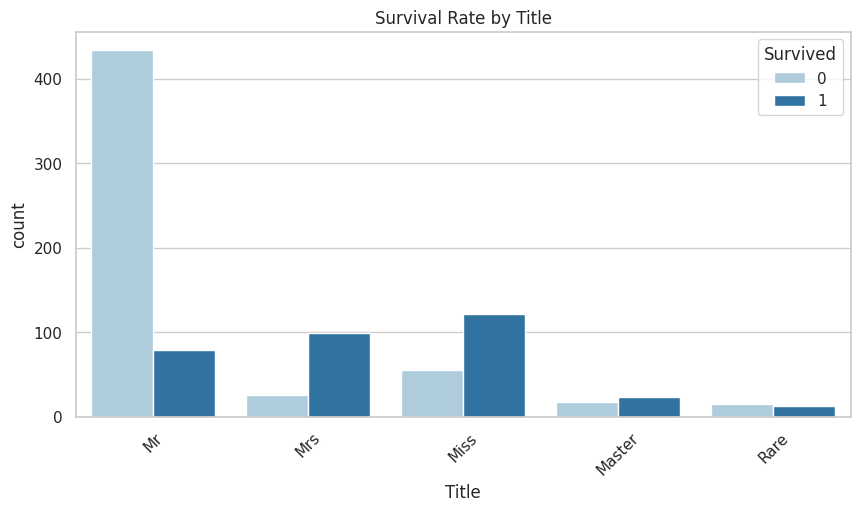

In [27]:
# Extract title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Visualize survival by title
sns.countplot(x='Title', hue='Survived', data=df, palette='Paired')
plt.xticks(rotation=45)
plt.title("Survival Rate by Title")
plt.show()


In [ ]:
'''
insights>>
- 💡 Women had a higher survival rate than men.
- 💡 1st Class passengers had better survival chances.
- 💡 Children and young adults had slightly better odds.
- 💡 Fare and Title features are strong indicators of survival.
- 💡 Data had outliers and missing values, handled using median/mode.
- 💡 Cabin had too many missing values, dropped.
'''

In [28]:
# Save final cleaned dataset for ML or submission
df.to_csv("Cleaned_Titanic_Dataset.csv", index=False)